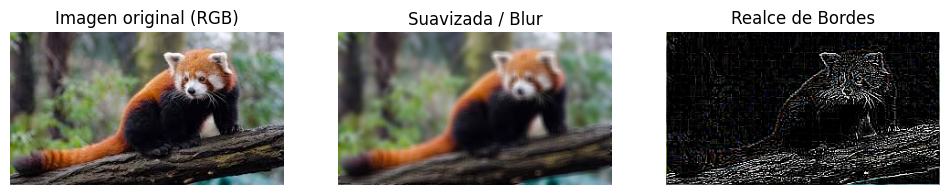

In [8]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

imagen = Image.open("animal_en_extincion.jpg")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(imagen)
plt.axis("off")
plt.title("Imagen original (RGB)")

suavizada = imagen.filter(ImageFilter.BLUR)

plt.subplot(1, 3, 2)
plt.imshow(suavizada)
plt.axis("off")
plt.title("Suavizada / Blur")

bordes = imagen.filter(ImageFilter.FIND_EDGES)

plt.subplot(1, 3, 3)
plt.imshow(bordes, cmap="gray")
plt.axis("off")
plt.title("Realce de Bordes")

plt.show()


En el blur el fondo y el tronco no se distingen bien, mientras que en el realce de bordes el fondo se pierde completamente

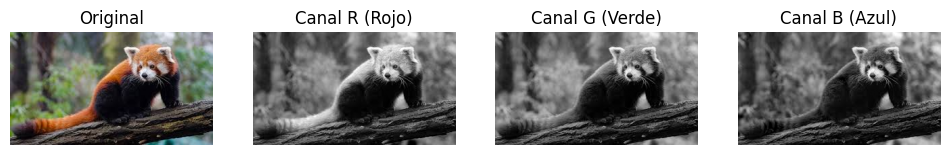

In [9]:
import numpy as np

img_np = np.array(imagen)

R = img_np[:, :, 0]   # Canal Rojo
G = img_np[:, :, 1]   # Canal Verde
B = img_np[:, :, 2]   # Canal Azul

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(imagen)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(R, cmap="gray")
plt.title("Canal R (Rojo)")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(G, cmap="gray")
plt.title("Canal G (Verde)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(B, cmap="gray")
plt.title("Canal B (Azul)")
plt.axis("off")

plt.show()


- En el canal R el pelaje del panda rojo (especialmente la espalda y la cabeza) se ve claro, porque su color natural contiene mucho rojo/anaranjado.
- En el canal G el bosque, hojas y vegetación se ven más claras, porque contienen tonos verdes intensos.
- En el canal B el panda rojo se ve oscuro, porque su color contiene casi nada de azul.

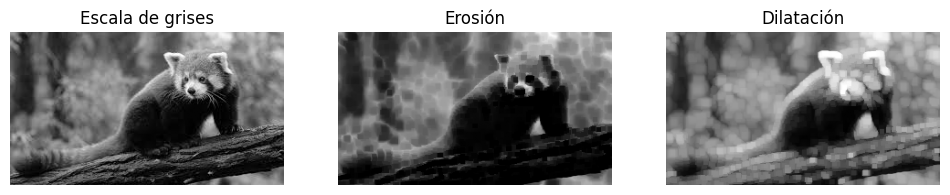

In [10]:
import cv2

img = cv2.imread("animal_en_extincion.jpg", cv2.IMREAD_GRAYSCALE)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

# 1. Erosión en escala de grises
erosion = cv2.erode(img, kernel, iterations=1)

# 2. Dilatación en escala de grises
dilatacion = cv2.dilate(img, kernel, iterations=1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap="gray")
plt.title("Escala de grises")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(erosion, cmap="gray")
plt.title("Erosión")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(dilatacion, cmap="gray")
plt.title("Dilatación")
plt.axis("off")

plt.show()


1. Erosión:
- Se oscurecen los bordes del panda y del tronco.
- Se pierden detalles claros (pelaje iluminado).
- El fondo se vuelve más homogéneo.
2. Dilatación:
- Las zonas claras del pelaje del panda se vuelven más brillantes.

- Las líneas y bordes iluminados se hacen más gruesos.

- El tronco se ve más claro en sus zonas iluminadas.

In [11]:


original = Image.open("animal_en_extincion.jpg").convert("RGB")

# Filtro suavizado
suavizada = original.filter(ImageFilter.BLUR)

# Bordes (PIL)
bordes = original.filter(ImageFilter.FIND_EDGES)

# Operaciones morfológicas (OpenCV en escala de grises)
img_gray = cv2.imread("animal_en_extincion.jpg", cv2.IMREAD_GRAYSCALE)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
erosion = cv2.erode(img_gray, kernel, iterations=1)
dilatacion = cv2.dilate(img_gray, kernel, iterations=1)

# Convertir las imágenes de morfología a PIL
erosion_pil = Image.fromarray(erosion)
dilatacion_pil = Image.fromarray(dilatacion)

frames = [
    original,
    suavizada,
    bordes,
    erosion_pil,
    dilatacion_pil
]

frames[0].save(
    "animacion.gif",
    save_all=True,
    append_images=frames[1:],
    duration=800,
    loop=0
)

print("GIF generado como: animacion.gif")


GIF generado como: animacion.gif
